Задачи занятия:
1. Загрузить и визуализировать график силы деформирования, полученный при испытаниях плоского образца на растяжение;
2. Пересчитать график силы деформирования в график инженерных и истинных напряжений и деформаций;
3. Визуализировать график инженерных напряжений и деформаций;
4. Визуализировать график истинных напряжений и деформаций;
5. Определить предел прочности материала;
6. Определить равномерное удлинение материала.

Данные перемещение-сила стали 08кп толщиной 1.5 мм хранятся по следующей локации: `../data/load_stroke_data.txt`.


In [23]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt
# испортируем библиотеку для базовых математических расчетов
import math

для чтения данных из файла нам понадобятся две переменные типа list: 
stroke - для хранения данных о перемещении, load - для хранения данных о силе

In [24]:
stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе
# Проверим содержание этих двух переменных
stroke, load

# открываем файл с данными
with open ('../data/load_stroke_data.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split()                       # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[0]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[1]))               # второе число в список load

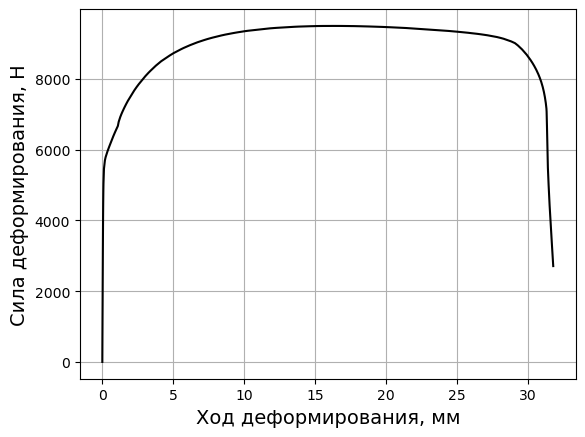

In [25]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для график
plt.plot (stroke, load, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

Пересчет графика сила деформирования по ходу деформирвоания в график инженерное напряжение - инженерная деформация происходит по следующим формулам:
$$
\sigma_{eng} = \frac{F}{A_0} \text {,}  \quad \epsilon_{eng} = \frac{\Delta L}{L_0}\times 100\%
$$
где:
$$
\begin{flalign}
\sigma_{eng} \text{ - инженерное напряжение течения, МПа} &&
\end{flalign}
$$
$$
\begin{flalign}
\epsilon_{eng} \text{ - инженерная деформация, \%} &&
\end{flalign}
$$



$$
\begin{flalign}
F \text{ - сила деформирования, Н} &&
\end{flalign}
$$

$$
\begin{flalign}
A_0 \text{ - площадь сечения образца,} \text{ мм}^2 &&
\end{flalign}
$$

$$
\begin{flalign}
\Delta L \text{ - ход деформирвоания, мм} &&
\end{flalign}
$$

$$
\begin{flalign}
L_0 \text{ - начальная длина образца, мм} &&
\end{flalign}
$$

In [26]:
# Расчет инженерного напряжения
b0 = 20 # ширина образца по ISO 6892-1:2019
L0 = 80 # начальная длина образца по ISO 6892-1:2019
t0 = 1.5 # тольщина образца по исходны данным
A0 = b0*t0 # расчет площади поперечного сечения образца

sigma_eng = [] # пустой список куда будем записывать значения инженерного напряжения
for i in range (0, len(load)):
    sigma_eng.append(load[i]/A0)

In [27]:
# Расчет инженерной деформации
epsilon_eng = [] # пустой список куда будем записывать значения инженерной деформации
for i in range (0, len(stroke)):
    epsilon_eng.append((stroke[i]/L0)*100)

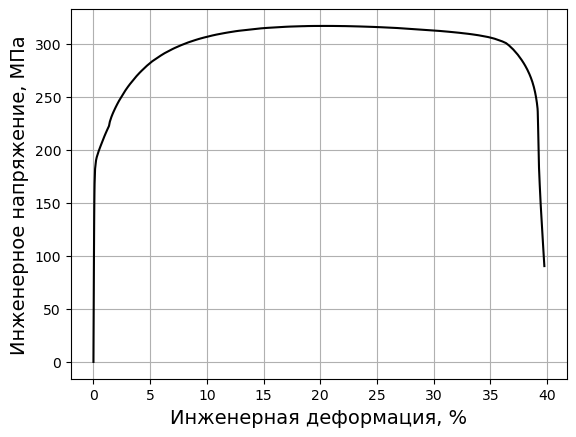

In [28]:
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_eng, sigma_eng, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Инженерная деформация, %', fontsize = 14)
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

Расчет истинных напряжений и истинных деформаций будем проводить по следующим формулам:
$$
\sigma_{\text{true}} = \sigma_{\text{eng}} \cdot (1 + \varepsilon_{\text{eng}}), \quad
\varepsilon_{\text{true}} = \ln(1 + \varepsilon_{\text{eng}})
$$

In [32]:
# Расчет истинного напряжения и деформации
sigma_true = [] # пустой список куда будем записывать значения истинного напряжения
epsilon_true = [] # пустой список куда будем записывать значения истинной деформации
for i in range (0, len(sigma_eng)):
    sigma_true.append(sigma_eng[i]*(1+epsilon_eng[i]/100))
    epsilon_true.append(math.log(1+epsilon_eng[i]/100))

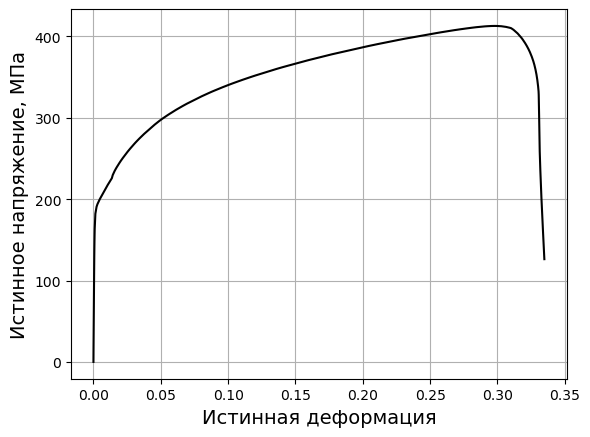

In [33]:
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_true, sigma_true, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Истинная деформация', fontsize = 14)
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

Предел прочности материала (Rm) - наибольшее напряжение, которое способен выдержать образец при растяжении и после которого начинает образовываться шейка и начинается разрушеие образца. Таким образом задача определения предела прочности сводится к поиску максимального значения инженерного напряжения.

In [35]:
# Поиск предла прочности (максимального значения инженерного напряжения)
Rm = 0 # начальное значение переменной, которая будет хранить предел прочности
for i in range (1, len(sigma_eng)):
    if sigma_eng[i] > Rm:
        Rm = sigma_eng[i]
        i_m = i # номер строки в массиве данных, которому соответсвует предел прочности (эта переменная нам понадобится позже)
print (f'Предел прочности Rm = {Rm}, при i = {i_m}')

Предел прочности Rm = 316.73559757692743, при i = 4162


Равномерное удлинение материала (Ag), также известное как относительное удлинение, это характеристика, показывающая, насколько материал может растягиваться до разрыва. Определяется по следующей формуле:
$$
A_g = \varepsilon_{\text{eng}}\text{[i]} - \frac{\sigma_{\text{eng}}\text{[i]}}{E}
$$
где:
$$
\begin{flalign}
\text{i - номер строки в массиве данных, которому соответсвует предел прочности;} &&
\end{flalign}
$$
$$
\begin{flalign}
\text{E - модуль Юнга, МПа;} &&
\end{flalign}
$$
$$
\begin{flalign}
\sigma_{\text{eng}}\text{[i]} \text{ - соответсвует пределу  прочности Rm, МПа} &&
\end{flalign}
$$
$$
\begin{flalign}
\varepsilon_{\text{eng}}\text{[i]} \text{ - общая деформация (упругая + пластическая), соответсвует пределу прочности Rm} &&
\end{flalign}
$$



In [39]:
# Расчет равномерного удлинния
E = 210000 # модуль Юнга для стали принято брать 210 000 МПа
Ag = epsilon_eng[i_m] - (Rm/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 20.434%
